## SetC

## 1. Write a python program to implement complete data pre-processing in a given data
## set.(missing value, encoding categorical value, Splitting the dataset into the training
## and test sets and feature scaling.(Download dataset from github.com).

In [5]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotilb

ERROR: Could not find a version that satisfies the requirement matplotilb (from versions: none)
ERROR: No matching distribution found for matplotilb


dataset=
     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.10

D:\Software_Installed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software_Installed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software_Installed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software_Installed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

StandardScaler() df2['Age']
=      Age
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
..    ...
886  27.0
887  19.0
888   NaN
889  26.0
890  32.0

[891 rows x 1 columns]


D:\Software_Installed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


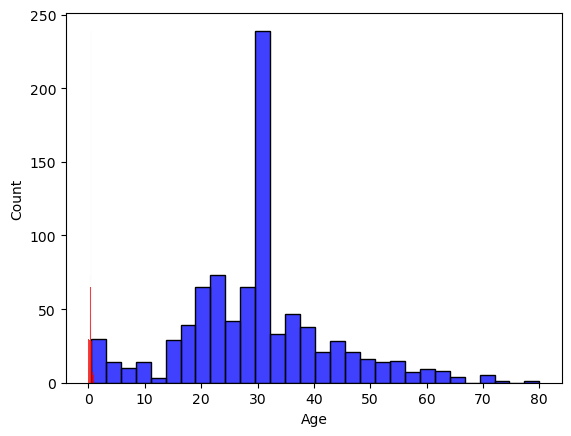

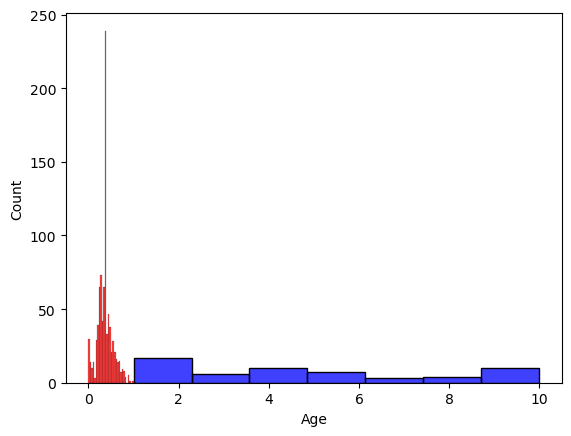

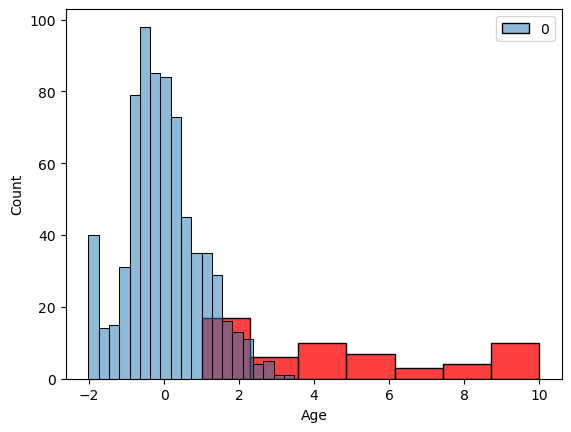

In [79]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 18 20:41:25 2024

@author: bagew
"""
"""
1. Write a python program to implement complete data pre-processing in a given data
set.(missing value, encoding categorical value, Splitting the dataset into the training
and test sets and feature scaling.(Download dataset from github.com)
"""
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as per
import matplotlib.pyplot as plt
from sklearn.preprocessing  import StandardScaler

filepath=r"C:\Users\bagew\Downloads\DataSci\Datasets\titanic.csv"
df=pd.read_csv(filepath)
df2=pd.read_csv(filepath)
print(f"dataset=\n{df.to_string()}\n")

#head of dataset
print(f"dataset head=\n{df.head()}\n")

#check for null values
print(f"Null values=\n{df.isna().to_string()}\n")

#information about dataset
print(f"dataset info=\n{df.info()}")
print(f"dataset columns=\n{df.columns.str.strip()}\n")

#fill missing values 
imputer=SimpleImputer(strategy='mean')#imputer object creation
df[['Age']]=imputer.fit_transform(df[['Age']])
print(f"df['Age']\n={df['Age'].to_string()}")
"""
The double square brackets [['Temperature']] 
ssssensure that the selection is a DataFrame, not a Series, 
which is important for the imputer.
"""
print(f"df=\n={df.to_string()}")

#encoding categorical value
#LabelEncoder
labelEncoding=LabelEncoder() #object creation
df['Pclass']=labelEncoding.fit_transform(df['Pclass'])
print(f"LabelEncoder() df['Pclass']\n={df['Pclass'].to_string()}")
print(f"df=\n={df.to_string()}")

#OneHotEncoding
ohe=pd.get_dummies(df,columns=['Survived','Pclass'])
print(f"OneHotEncoding df[['Survived','Pclass']]\n={df[['Survived','Pclass']].to_string()}")
print(f"ohe=\n={ohe.to_string()}")

#OrdinalEncoder
ordinalEncoding=OrdinalEncoder()
df['Survived']=ordinalEncoding.fit_transform(df[['Survived']])
print(f"=OrdinalEncoder() df[['Survived']]\n={df[['Survived']].to_string()}")
print(f"df=\n={df.to_string()}")

#Splitting the dataset into the training and test sets
x=df[['Pclass','Name','Sex','Age']]
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(f"x_train=\n{x_train}\n")
print(f"x_train shape\n={x_train.shape}\n")
print(f"x_test\n={x_test}\n")
print(f"x_test shape\n={x_test.shape}\n")
print(f"y_train=\n{y_train}\n")
print(f"y_train shape\n={y_train.shape}\n")
print(f"y_test\n={y_test}\n")
print(f"y_test shape\n={y_test.shape}\n")

#feature scaling
age=per.minmax_scale(df['Age'],feature_range=(0,1))
sns.histplot(df['Age'],color='blue')
sns.histplot(age,color='red')
plt.figure() # to seperate graphs
sns.histplot(df['Age'],color='blue',binrange=(1,10))
sns.histplot(age,color='red')
plt.figure() # to seperate graphs

with pd.option_context('mode.use_inf_as_na',True):
    scaler=StandardScaler()
    Age_Stand=scaler.fit_transform(df2[['Age']])
    print(f"StandardScaler() df2['Age']\n={df2[['Age']]}")
    #sns.histplot(df2['Age'],color='red')
    #sns.histplot(Age_Stand,color='red') 
    sns.histplot(df['Age'],color='red',binrange=(1,10))
    sns.histplot(Age_Stand)